<a id='top'></a>

# CSCI3022 S21
# Homework 4: Using Random Variables
***

**Name**: ________________________________________________________________________

***

This assignment is due on Canvas by **MIDNIGHT on Monday, March 1**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

[Back to top](#top)

<a id='p1'></a>

## (25 pts) Problem 1 (Theory): Working with Distributions
***

One takeaway from our exercise on homework 1 might be the statement that "Boulder has storm that generates over 12 inches of rain **once per 100 years**."  Let's explore what that probability statement might imply!

**Part A**: Suppose that attempt to *count* occurrences of "massive rainfall" with a Poisson process.  For a *fixed* interval of 100 years, we would assert that the rate $\lambda$ of massive rainfalls is $\lambda = 1 \frac{heavy\, rain}{100 \, yr \, interval.}$

Using `stats.poisson` and the related functions, print a list of the probabilities of observing exactly $k$ such storms in a 100-year interval for $k=0,1,2,\dots 10$. 

In [7]:
kvals=np.linspace(0,10,11)
p_probs=[stats.poisson.pmf(k,mu=1) for k in kvals]
[print('Probability of', kvals[i], 'storms is,', probs[i]) for i in range(11)];

Probability of 0.0 storms is, 0.36787944117144233
Probability of 1.0 storms is, 0.36787944117144233
Probability of 2.0 storms is, 0.18393972058572114
Probability of 3.0 storms is, 0.06131324019524039
Probability of 4.0 storms is, 0.015328310048810101
Probability of 5.0 storms is, 0.00306566200976202
Probability of 6.0 storms is, 0.0005109436682936698
Probability of 7.0 storms is, 7.299195261338139e-05
Probability of 8.0 storms is, 9.123994076672672e-06
Probability of 9.0 storms is, 1.013777119630298e-06
Probability of 10.0 storms is, 1.0137771196302987e-07


**Part B**: We could instead consider describing the process of "each year is independently and identically likely to contain a heavy storm with probability $1/100$."  This would suggest a different random variable to count the number of heavy storms in a 100 year period.  Which one?

Using the appropriate random variable and its implementation in `scipy.stats`, again print a list of the probabilities of observing exactly $k$ storms in a 100-year interval (again, do all of $k=0,1,2,\dots 10$).

In [9]:
kvals=np.linspace(0,10,11)
bin_probs=[stats.binom.pmf(k,n=100, p=1/100) for k in kvals]
[print('Probability of', kvals[i], 'storms is,', bin_probs[i]) for i in range(11)];

Probability of 0.0 storms is, 0.3660323412732295
Probability of 1.0 storms is, 0.36972963764971983
Probability of 2.0 storms is, 0.18486481882486308
Probability of 3.0 storms is, 0.060999165807528455
Probability of 4.0 storms is, 0.014941714856894668
Probability of 5.0 storms is, 0.0028977871237616114
Probability of 6.0 storms is, 0.00046345080262179115
Probability of 7.0 storms is, 6.286345663267816e-05
Probability of 8.0 storms is, 7.381693771261511e-06
Probability of 9.0 storms is, 7.621950919821188e-07
Probability of 10.0 storms is, 7.006035693977161e-08


**Part C**: Are your results in Part A and Part B the same?  Why or why not?  What fundamental assumptions are different in using a Poisson model to describe this process instead of the model in Part B?

**Solution**: They're not!  This is because the poisson counts the number of storms, and the binomial counts *whether or not* a storm happens in a given year.  They will differ if there's ever a year with more than one storm, since the binomial won't see the second storm!

**Part D**: We could also use the *Geometric* random variable to track an event like "what is the probability that we *don't* observe a single heavy storm in the 100 year interval."  Would this calculation agree with the corresponding probability (observing $k=0$ storms) from the models in Parts A and B?  Why or why not?  You may use code to justify your answer.

Solution: Not observing a storm in the 100 year interval is the same as the binomial returning zero, since it relies on the assumption that each year is independent.  Here we check if the "first" storm is in year 101 or later.

In [10]:
print(1-stats.geom.cdf(100,p=1/100))

0.3660323412732295


[Back to top](#top)

<a id='p2'></a>

## (25 pts) Problem 2 (Computation): Working with Continuous Distributions
***
Suppose you are creating a model to describe how long it takes you to complete your homework assignments.  For each assignment, the time required is a random variable $X$ that returns the number of hours required for that assignment.  You decide to use the following pdf for $X$:

$$
f(x) = \begin{cases}
         k \ x \ e^{\left(-\frac{x^2}{4}\right)} & 0 \leq x < \infty \\
         0                           & \text{otherwise}
       \end{cases}
$$
where $k$ is some normalizing constant.

**Part A**: Determine the value of $k$ such that $f(x)$ is a valid probability density function. Then, make a plot of the probability density function, $f(x)$. Be sure to label your plot and axes!

By hand, we check that $\int_0^\infty f(x)\, dx=1$:

$$\int_0^\infty f(x)\, dx=k (-2)(e^{\left(-\frac{x^2}{4}\right)})\rvert^\infty_0= -2k(0-1)=2k$$

so we choose $k=1/2$ to make this integrate to 1.

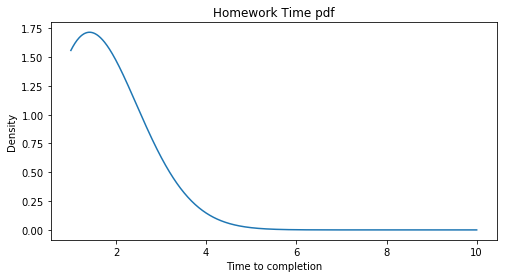

In [23]:
f=lambda x: 2*x*np.exp(-x**2/4)
xgrd=np.linspace(1,10,1000)
fig, ax=plt.subplots(figsize=(8,4))
plt.plot(xgrd, f(xgrd))
ax.set_ylabel('Density')
ax.set_xlabel('Time to completion');
ax.set_title('Homework Time pdf');

**Part B**: Compute *by hand* the cumulative density (cdf) function $F(x)$ for $X$.

By hand, we perform $F(x)= \int_0^x f(t)\, dt$:

$$\int_0^x f(t)\, dt=\frac{1}{2} (-2)(e^{\left(-\frac{t^2}{4}\right)})\rvert^x_0= -(e^{-\frac{x^2}{4}}-1)=1-e^{-\frac{x^2}{4}}$$

we sanity check that $F(0)=0$ and $\lim_{x \to \infty} F(x)=1$.

**Part C:**  Use the cdf you derived in **Part B** to calculate the median ($\tilde{x}$) time required for an assignment.

By hand, we set $F(\tilde{x})= 0.5$ and solve for $\tilde{x}$.

$$0.5=1-e^{-\frac{\tilde{x}^2}{4}} \implies \ln(0.5)=\frac{-\tilde{x}^2}{4}\implies \tilde{x}=\sqrt{-4\ln0.5}$$


In [12]:
np.sqrt(-4*np.log(0.5))

1.6651092223153954

**Part D**: It is a well-known fact that any assignment that takes longer than 200 minutes is **abhorrent**. Use the cdf you computed in **Part B** to find the probability that any arbitrary assigment that you observe is abhorrent.

We're looking for the probability of outcomes 200/60 or greater, so that's one minus the cdf at 200/60.

In [25]:
F=lambda x: 1-np.exp(-x**2/4)
p_abhor=1-F(200/60)
print('Prob 200 min or more:', p_abhor)

Prob 200 min or more: 0.062176524022116264


**Part E:**  You've done some homework and tallied up the results! Suppose you sample 6 assignment durations, and the duration of any one assignment is independent of the duration of the others. What is the probability that at least 3 but not all of them are **not** abhorrent?

At least 3 but not all of them being abhorrent means 3, 4, or 5 total were abhorrent.  We can just sum these off of a binomial!  The value is pretty small, since each assignment is only around 6% to be abhorrent we don't often see 3, 4, or 5 out of 6 being that bad!


In [26]:
counts=[3,4,5]
print(np.sum([stats.binom.pmf(count, n=6, p=p_abhor) for count in counts]))

0.004167666713630946


[Back to top](#top)

<a id='p3'></a>

## (45 pts) Problem 3: Simulation (Stochastic Integration)
***

One really cool application of random variables is using them to approximate integrals/areas - an extension of the estimation of $\pi$ done in nb04.  The random method of approximating integrals is used frequently in computational science to approximate really difficult integrals that we *never* want to do by hand.  In this exercise you'll figure out how we can do this in practice and test your method on an integral that we could do by hand. 

**Part A.**  Let $L$ be a random variable representing how happy your new desk plant, Fernoulli Jr., is today.  It's measured by the **Lushness Index** (LI).  Suppose the probability density function for $L$ is on a scale from zero to one, and is described by an arcsine function:

$$
f_L(a) = \begin{cases}
         \left(\frac{1}{\frac{\pi}{2}-1}\right)\sin^{-1}(a) & 0 \leq a \leq 1 \\
         0                           & \text{otherwise}
         \end{cases}
$$

A Lushness Index of 1 means Fernoulli Jr. is feeling  well-watered, content, and ready to perform binary statistical experiments.  A Lushness Index of 0 means that your plant is really in need of some more sunlight.  



Compute **by hand**, the integral of $f(a)$ for $0 \leq a \leq 1/2$.  Write a sentence or two to interpret your result physically, in the context of this problem set-up.

*Hint*: this is classically an integral that makes use of the fact that $\frac{d}{dx} \sin^{-1}(x)=\frac{1}{\sqrt{1-x^2}}$.  That sounds like *"part"* of the solution.  You should also probably make sure you take a look at the plot of $f$, making mental note of it's minima, maxima, etc. over that interval.

**Solution** 

Ignoring the constant out front, let's do $\int \sin^{-1} x \, dx$:

$$\begin{align}
\int \sin^{-1} x \, dx & \stackrel{IBP}{=} x \sin^{-1}(x)- \int \frac{x \, dx}{\sqrt{1-x^2}} \\
& = x \sin^{-1}(x)+ \sqrt{1-x^2}  + C\\
\end{align}$$
Plugging in the bounds of 1/2 and zero gives: $\frac{1}{2} \sin^{-1}{1/2}+\sqrt{3/4}= \frac{\pi}{12}+\sqrt{3/4}-1$.  Multiplying the constant out front back in:

$$\int_0^{1/2} \sin^{-1} x \, dx = \left(\frac{1}{\frac{\pi}{2}-1}\right)\left(\frac{\pi}{12}+\frac{\sqrt{3}}{2}-1\right)$$

If that wasn't enjoyable... that's OK!  That's why we have computational methods like the rest of the problem!

**Part B.** What is the maximum of $f_L(a)$ over the interval $[0,1]$?  For the rest of the problem, we will refer to this value by $m$.

$sin^{-1}(1)=\pi/2$, and since the function is increasing the max is $\frac{1}{1-\frac{2}{\pi}}$

**Part C.** Suppose we sample a continuous uniform random variable $X\sim U(0,1/2)$ and another  random variable $Y \sim U(0,m)$ and think of them as $x$- and $y$-coordinates of a point in the box $[0,1/2] \times [0,m]$, or inside the box composed of all points $\{(x,y)\,|\, x \in [0,1/2], y \in [0,m]\}.$  

If we compute the ratio of points that fall under the curve $f(x)$ to the total points sampled, what does this value estimate? 

This ratio will estimate the proportion of the box (which has area m/2) that's under the curve.

**Part D.** How could we modify the process outlined in the previous part so that our estimator estimates the value of the desired integral?  If you need inspiration, check out the in-class notebook on Stochastic Simulation (#4), specifically, the exercise where we estimated $\pi$!

The ratio of the points under the curve should be the same as the ratio of area under the curve.  So if we multiply by the area of the box, we'll be estimating the area of the curve.

**Part E.** Complete the function `integrate` below to compute an approximation to the definition integral $\int_0^{\text{ub}} f(x)dx$.  Your function should take as arguments:
1. `num_samples` -- the number of points to sample,
2. `ub` -- a number between $0$ and $1$ that is the upper bound of the integral, and
3. `isPlot` -- a Boolean flag for whether or not to display a plot of the results.

Your function should return an approximation of the definite integral by sampling $X$ from $U(0,\text{ub})$ and $Y$ from $U(0,m)$. For each random draw $(X,Y)$, define the random variable $Z$ that represents whether or not the sampled $Y$ value is less than $f(X)$ for the corresponding $X$ value.

Your function should perform three tasks: 

1. return the estimate of the value of the integral,
2. return the sample variance of the random variable $Z$ being simulated, using the np.var function, and
3. if `isPlot` is True, plot the curve $f(x)$ as well as the location of the points $(X,Y)$, colored according to whether they fall above or below the curve. 

In [62]:
# GIVEN CODE - Do not change the inputs/outputs or your code will fail unit tests and auto-grading!
asin= lambda x: np.arcsin(x)/(np.pi/2-1)
M=1/(1-2/np.pi)

def integrate(num_samples, ub, isPlot):
    #computations for estimated area here
    x = np.random.uniform(0, ub, num_samples)
    y = np.random.uniform(0, M, num_samples)
    fx = asin(x)
    rv = y<fx 
    estimate = ub*M*np.sum(rv)/num_samples
    sample_var = np.var(rv)
    if isPlot:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6)) 
        xval = np.arange(0, 1, 1/100)
        ax.plot(xval, asin(xval),'--')
        ax.scatter(x[y<=fx],y[y<=fx],c=['red'],marker = 'v')
        ax.scatter(x[y>fx],y[y>fx],c='blue',s = 5)

    return estimate, sample_var 

**Part F.** Write your own small unit tests!

First, what should your `integrate` function output if you plug in `ub=0`? Set that as `int_0_to_0` below.

Second, what should your `integrate` function output if you plug in `ub=`1?  (Is this actually a valid pdf?) Set that as `int_0_to_1` below.

Then, you can execute the cell below to run two sanity checks. Write out **in math** (like, a definite integral) what each of these two tests is checking and **why** that is a reasonable sanity check.

If these two assertions run without fail, then things seem to be working okay. Note that the upper endpoint test involves randomness, so if it fails, try running it a few times. If it fails a lot, then things are probably going wrong.

In [68]:
int_0_to_0  =  0
int_0_to_1 =  1


#---------------------------------------
# DO NOT EDIT THIS CELL BELOW HERE
#---------------------------------------
import math
assert integrate(1000, 0, False)[0]==int_0_to_0, "Error: lower endpoint test failing"
assert math.isclose(integrate(10000, 1, False)[0],int_0_to_1,abs_tol=0.03), "Error: upper endpoint test failing"

**Typeset the rest of solution for Problem E in this cell or cells.**

**Part G.** Run your simulation with `isPlot=True` and `ub=`$1/2$ for 1,000 samples so we can see your plot. Then, run your simulation (with `isPlot=False`) with at least 10,000 samples and estimate the value of the given integral. Be sure to leave your cells evaluated for the graders! Does your estimate agree with the exact value of the integral you computed in **Part A**?  As a whole, what advantage does this process offer over actually doing the integral by hand?

(0.2171279392774562, 0.13289916000000002)

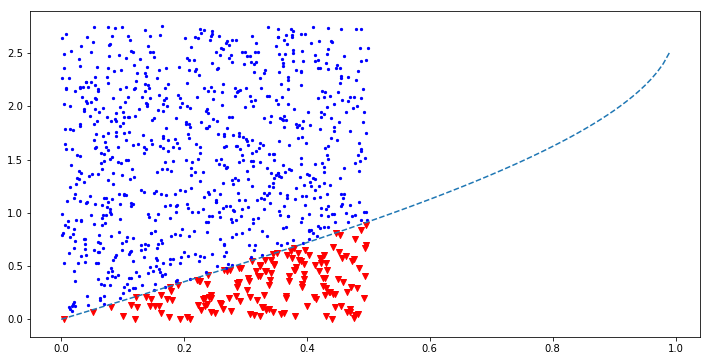

In [64]:
#Integrate, plot, and estimate!
integrate(1000, 1/2, True)
integrate(10000, 1/2, False)

The advantage is that we don't *have* to integrate by hand.  That said, this method is both subject to more error and takes longer than standard numerical quadrature techniques (RK4, Simpson's Rule, etc.), so in practice we don't really use it for this.  That said, this style of estimation is called an *accept/reject* algorithm because it uses randomness to sometimes *accept* values below the curve as estimates of the area.  They're common in a lot of scenarions!